In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import holoviews as hv
hv.extension('bokeh')

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:

# Plot your data to see what's in your DataFrame
plot = df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

# Display the plot
plot

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [5]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data and transform it
scaled_data = scaler.fit_transform(df_market_data)

In [6]:
# Create a DataFrame with the scaled data
df_scaled = pd.DataFrame(scaled_data, columns=df_market_data.columns)

# Copy the crypto names from the original data
df_scaled['coin_id'] = df_market_data.index
# Set the coinid column as index
df_scaled.set_index('coin_id', inplace=True)

# Display sample data
df_scaled.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


---

### Find the Best Value for k Using the Original Data.

In [7]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [8]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
for k in k_values:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, random_state=1)
    
    # 2. Fit the model to the data using `df_scaled`
    kmeans.fit(df_scaled)
    
    # 3. Append the model.inertia_ to the inertia list
    inertia.append(kmeans.inertia_)


c:\Users\steve\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\steve\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\steve\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\steve\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak

In [9]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'k': k_values,
    'inertia': inertia
}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

# Display the DataFrame
df_elbow.head()

,k,inertia
0,1,287.000000
1,2,195.820218
2,3,123.190482
3,4,79.022435
4,5,63.858668


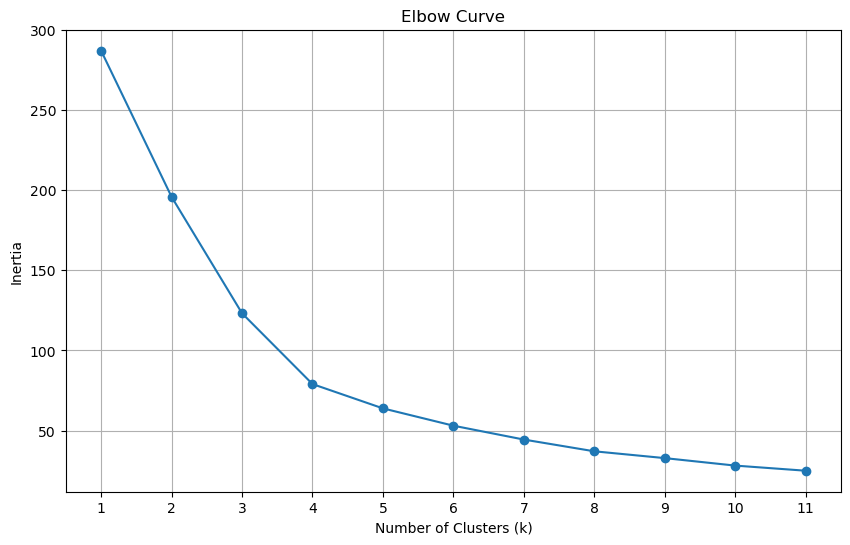

In [10]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(df_elbow['k'], df_elbow['inertia'], marker='o')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)  # Ensure all k-values are shown on the x-axis
plt.grid(True)
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 4

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [11]:
# Initialize the K-Means model using the best value for k
best_k = 4
kmeans_model = KMeans(n_clusters=best_k, random_state=1)

In [12]:
# Fit the K-Means model using the scaled data
kmeans_model = KMeans(n_clusters=best_k, random_state=1)
# Fit the model to the scaled data
kmeans_model.fit(df_scaled)

c:\Users\steve\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\steve\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=1)

In [13]:
# Predict the clusters to group the cryptocurrencies using the scaled data
cluster_labels = kmeans_model.predict(df_scaled)

# Print the resulting array of cluster values.
print(cluster_labels)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 3 2 0 0 1
 0 0 0 0]


In [14]:
# Create a copy of the DataFrame
df_scaled['Cluster'] = cluster_labels

In [15]:
# Add a new column to the DataFrame with the predicted clusters
df_scaled['Cluster'] = cluster_labels

# Display sample data
df_scaled.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533,2
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284,2
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428,2
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351,2


In [16]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
scatter_plot = df_scaled.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="Cluster",
    hover_cols=["coin_id"],
    title="Cryptocurrency Price Change Percentage (24h vs 7d)",
    xlabel="24h Price Change (%)",
    ylabel="7d Price Change (%)",
    width=800,
    height=400
)

# Display the scatter plot
scatter_plot

:NdOverlay   [Cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [17]:
# Create a PCA model instance and set `n_components=3`.
from sklearn.decomposition import PCA
pca = PCA(n_components=3)

In [18]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
pca_data = pca.fit_transform(df_scaled)

# Create a DataFrame with the PCA data
df_pca = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3'])

# Copy the crypto names from the original data
df_pca['coin_id'] = df_scaled.index

# Set the coin_id column as index
df_pca.set_index('coin_id', inplace=True)

# Display the first five rows of the DataFrame
df_pca.head()


,PC1,PC2,PC3
coin_id,,,
bitcoin,0.448908,-1.245376,-0.850640
ethereum,0.495367,-0.899823,-1.317559
tether,-0.818846,0.071899,0.695015
ripple,-0.840357,0.080054,0.544360
bitcoin-cash,0.813240,-2.669520,-1.643321


In [19]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_

# Create a DataFrame to display the explained variance
explained_variance_df = pd.DataFrame(explained_variance, index=['PC1', 'PC2', 'PC3'], columns=['Explained Variance'])

# Display the explained variance DataFrame
explained_variance_df

,Explained Variance
PC1,0.348717
PC2,0.313634
PC3,0.226271


In [20]:
# Calculate the total explained variance
total_explained_variance = explained_variance.sum()

# Display the total explained variance
total_explained_variance


0.8886218549859446

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 88.86%

In [21]:
# Create a DataFrame with the PCA data
df_pca = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3'])

# Copy the crypto names from the original data
df_pca['coin_id'] = df_scaled.index

# Set the coin_id column as index
df_pca.set_index('coin_id', inplace=True)

# Display sample data
df_pca.head(10)


,PC1,PC2,PC3
coin_id,,,
bitcoin,0.448908,-1.245376,-0.850640
ethereum,0.495367,-0.899823,-1.317559
tether,-0.818846,0.071899,0.695015
ripple,-0.840357,0.080054,0.544360
bitcoin-cash,0.813240,-2.669520,-1.643321
binancecoin,0.822871,-1.682096,-0.905203
chainlink,0.913868,-1.128684,-2.730038
cardano,0.811102,-1.113378,-1.598655
litecoin,0.258728,-0.946884,-1.103560


---

### Find the Best Value for k Using the PCA Data

In [22]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [23]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # Inside the loop:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, random_state=1)
    # 2. Fit the model to the data using `df_market_data_pca`
    kmeans.fit(df_pca)
    # 3. Append the model.inertia_ to the inertia list
    inertia.append(kmeans.inertia_)


c:\Users\steve\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\steve\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\steve\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\steve\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak

In [24]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'k': k_values,
    'inertia': inertia
}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

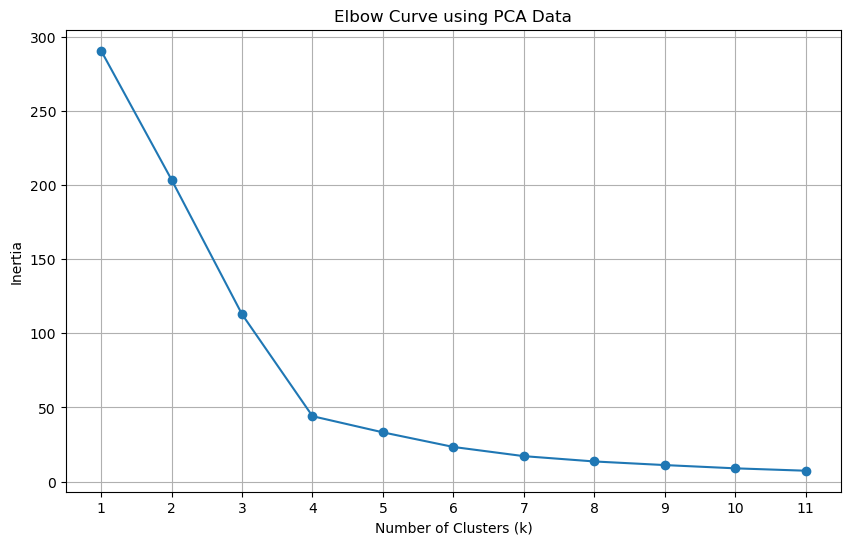

In [25]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(df_elbow['k'], df_elbow['inertia'], marker='o')
plt.title('Elbow Curve using PCA Data')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)  # Ensure all k-values are shown on the x-axis
plt.grid(True)
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No, it does not differ. The best k value is 4 for both the original data and the PCA data.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [26]:
# Initialize the K-Means model using the best value for k
best_k = 4
kmeans_model = KMeans(n_clusters=best_k, random_state=1)

In [27]:
# Fit the K-Means model using the PCA data
kmeans_model.fit(df_pca)

c:\Users\steve\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\steve\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=1)

In [28]:
# Predict the clusters to group the cryptocurrencies using the PCA data
cluster_labels = kmeans_model.predict(df_pca)

# Print the resulting array of cluster values.
print(cluster_labels)

[1 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 3 1 0 0 2
 0 0 0 0]


In [29]:
# Create a copy of the DataFrame with the PCA data
df_pca_clusters = df_pca.copy()

# Add a new column to the DataFrame with the predicted clusters
df_pca_clusters['Cluster'] = cluster_labels

# Display sample data
df_pca_clusters.head(10)


,PC1,PC2,PC3,Cluster
coin_id,,,,
bitcoin,0.448908,-1.245376,-0.850640,1
ethereum,0.495367,-0.899823,-1.317559,1
tether,-0.818846,0.071899,0.695015,0
ripple,-0.840357,0.080054,0.544360,0
bitcoin-cash,0.813240,-2.669520,-1.643321,1
binancecoin,0.822871,-1.682096,-0.905203,1
chainlink,0.913868,-1.128684,-2.730038,1
cardano,0.811102,-1.113378,-1.598655,1
litecoin,0.258728,-0.946884,-1.103560,1


In [30]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
scatter_plot = df_pca_clusters.hvplot.scatter(
    x='PC1',
    y='PC2',
    c='Cluster',
    hover_cols=['coin_id'],
    title='Cryptocurrency Clusters based on PCA Components',
    xlabel='Principal Component 1',
    ylabel='Principal Component 2',
    width=800,
    height=400
)

# Display the scatter plot
scatter_plot


:Scatter   [PC1]   (PC2,Cluster,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

c:\Users\steve\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\steve\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\steve\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\steve\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak

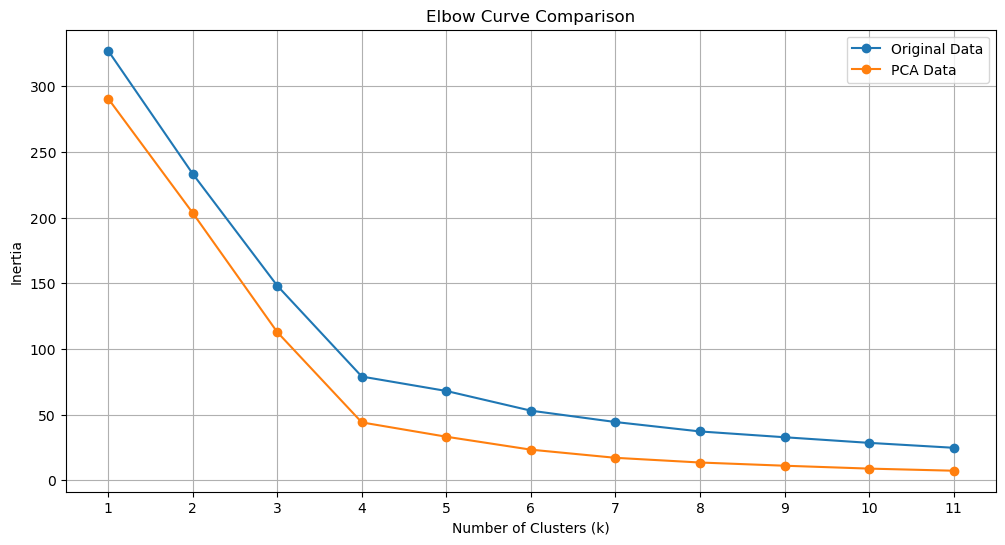

In [31]:
# Composite plot to contrast the Elbow curves
# Calculate inertia for original data
inertia_original = []
for k in k_values:
    kmeans_original = KMeans(n_clusters=k, random_state=1)
    kmeans_original.fit(df_scaled)
    inertia_original.append(kmeans_original.inertia_)

# Elbow curve data for the PCA data
inertia_pca = inertia  # Using the previously calculated inertia values for PCA data

# Create DataFrames for both Elbow curves
df_elbow_original = pd.DataFrame({'k': k_values, 'inertia': inertia_original})
df_elbow_pca = pd.DataFrame({'k': k_values, 'inertia': inertia_pca})

# Plot the Elbow curves in a composite plot
plt.figure(figsize=(12, 6))

# Plot for the original data
plt.plot(df_elbow_original['k'], df_elbow_original['inertia'], marker='o', label='Original Data')

# Plot for the PCA data
plt.plot(df_elbow_pca['k'], df_elbow_pca['inertia'], marker='o', label='PCA Data')

plt.title('Elbow Curve Comparison')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.legend()
plt.show()

In [34]:
# Composite plot to contrast the clusters
from holoviews import opts
# Scatter plot for original data
scatter_plot_original = df_scaled.hvplot.scatter(
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
    c='Cluster',
    hover_cols=['coin_id'],
    title='Clusters based on Original Data',
    xlabel='24h Price Change (%)',
    ylabel='7d Price Change (%)',
    width=400,
    height=400
)

# Scatter plot for PCA data
scatter_plot_pca = df_pca_clusters.hvplot.scatter(
    x='PC1',
    y='PC2',
    c='Cluster',
    hover_cols=['coin_id'],
    title='Clusters based on PCA Data',
    xlabel='Principal Component 1',
    ylabel='Principal Component 2',
    width=400,
    height=400
)

# Composite plot to contrast the clusters
composite_plot = scatter_plot_original + scatter_plot_pca
composite_plot.opts(
    opts.Layout(merge_tools=False)
)

# Display the composite plot
composite_plot

:Layout
   .Scatter.I  :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,Cluster,coin_id)
   .Scatter.II :Scatter   [PC1]   (PC2,Cluster,coin_id)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Using fewer features to cluster data with K-Means simplifies the process, making it faster and easier to understand. However, it may result in a loss of important information, leading to less accurate clusters. PCA can improve cluster separation by emphasizing the most significant variations, enhancing the clustering quality. Overall, while fewer features can clarify relationships, they might overlook some critical details from the original dataset.